Rechneranwendungen in der Physik - Übung N.4 

Santiago.R (in Zusammenarbeit mit Diego Rubio Carrera)

In [2]:
import numpy as np
import sympy as sy
from scipy import optimize
import matplotlib.pyplot as plt

Zuerst werden beide Suchfunktionen mit den jeweils wählbaren Parametern der Funktion und Startwerte als Variablen definiert.

# Bisektionsmethode

Die Bisektionsmethode beruht auf das sukzessive Prüfen eines Intervalls $[x1,x2]$ auf Nullstellen mit der Annahme, dass für $f(x1)*f(x2)<0$ eine Nullstelle im Intervall vorhanden sein muss. Dies ist auch wahr für Funktionen wo eine Nullstelle mit einem Vorzeichenwechsel vorliegt, was auch in den meisten Fällen zutrifft, aber bspw. bei $f(x)=x^2$ liegt eine Nullstelle bei $x_0=0$ im Intervall $[-1,1]$ vor, obwohl $f(-1)*f(1)=+1>0$ gilt. Diese Methode funktioniert somit auschließlich für Nullstellen mit Vorzeichenwechsel d.h. für $f(x_0)=0 \Rightarrow f'(x_0) \neq 0$. Ist dies der Fall wird die Nullstellensuche auf immer kleinere Intervalle $[x_1,x_3]$ geprüft mit $x_3=\frac{x2-x1}{2}$ bis der Bereich unterhalb eines Toleranzgebietes eingeschränkt und die Nullstellensuche abgebrochen wird.

In [3]:
def Bisektionsuchfunktion(f, x1, x2, tol=1e-8):
    """Annähernde Lösung für f(x_0)=0 mithilfe der Bisektionsmethode.

    Parameter
    ----------
    f : (function)
        Die Funktion für die die Nullstelle x0 mit f(x0)=0 gesucht werden soll.
    x1,x2 : (floats)
        Startwerte für den Intervall, in dem nach der Funktion gesucht werden soll. x1 muss kleiner als x2 sein
        und eine Nullstelle mit Vorzeichenwechsel muss im gegeben Intervall vorliegen, ansonstens gibt die Funktion
        einen Fehler als Output an.
    tol : (positive floats)
        Toleranz des eingeschränkten Gebietes.

    Returns
    -------
    Nullstelle und Iterationsnummer: (floats)
        Die Nullstelle, die durch das sukzessive einschränken des Nullstellenintervalls angenähert wird sowie die Iterationsnummer n.
        Sind x1 und x2 gleich bis auf eine Differenz unterhalb des Toleranzgebietes, dann wird der Mittelpunkt
        x3 zwischen beiden als Nullstelle angenohmen und als Output der Bisektionssuchfunktion herausgegeben.
    """
    
    n = 0 # Iterationsnummer 
    
    if f(x1)*f(x2) < 0 and x1<x2:

        f_Links = f(x1)

        while True:
            
            x_3 = (x1 + x2)/2 #Bilden des Mittelpunktes 
            f_Rechts = f(x_3) #Funktionswert des Mittelpunktes
            n += 1 #aktualisieren der Iterationsnummer
            if f_Rechts == 0 or (x2 - x1)/np.abs(x2 + x1) < tol: #Nullstellentest 
                Nullstelle = x_3
                break

            elif f_Links*f_Rechts < 0: 
                x2 = x_3
                
            else:
                x1 = x_3
                f_Links = f_Rechts
        Iterationsnummer = n    
        return Nullstelle, Iterationsnummer
    
    else:
        print("Fehler (Die Bisektion kann keine Nullstelle im ggb. Intervall finden)")

Test der Suchfunktion an einer Funktion $f(x)=x^3+x^2-10$ mit reeller Nullstelle und Vorzeichenwechsel an $x_0$

(1.8674600273370743, 28)

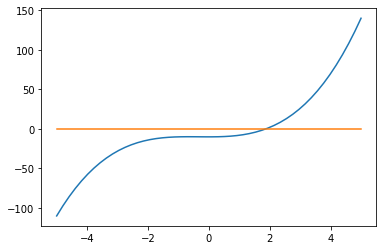

In [4]:
f = lambda x: x**3+x**2-10
x = np.linspace(-5,5)
plt.plot(x,f(x))
plt.plot(x,np.zeros_like(x))
plt.plot()
Bisektionsuchfunktion( f , x1=0, x2=4) # test der Funktion ''

# Sekantenverfahren

Der hier angewandte Sekantenverfahren beruht auf einer Vereinfachung des Newton-Raphson Verfahrens, bei dem die Nullstellensuche mithilfe der sukzessiven Berechnung der Nullstellen $x_{n+1}=x_n-\frac{f(x_n)}{f'(x_n)}$ einer Sekante mit $f'(x)=\frac{f(x_1+1e-4)-f(x_1)}{1e-4}$ angenähert wird. Somit werden in der Sekantensuchfunktion die Werte $x_{n+1}=x_n-\frac{f(x_n)*1e-4}{f(x_1+1e-4)-f(x_1)}$ sukzessiv berechnet, bis der gefundene Wert $x_{n+1}$ mit $f(x_{n+1})$ entweder $0$ ergibt oder unterhalb des Toleranzbereichs $tol=1e-8$ liegt. Ein Vorteil dieser Methode ist das auch Nullstellen ohne Vorzeichenwechsel ermittelt werden können, da die Sekanten auf die nähesten Funktionswerte zur X-Achse konvergieren, unabhängig vom Vorzeichen. Man braucht auch nicht zu wissen, im welchen Bereich die Nullstelle sein muss, denn bei genügend Iterationen wird das Sekantenverfahren trotzdem konvergieren. Ein Nachteil ist aber, dass bei mehreren Nullstellen es unintuitiv sein kann zu wissen, welche Nullstelle mit welchem Startparameter nun von der Sekantensuchfunktion berechnet wird. Außerdem funktioniert dieses Verfahren nicht, wenn $f'(x_0) \rightarrow 0$ geht, da nicht durch 0 dividiert werden kann.

In [5]:
def Sekantensuchfunktion(f, x_0, tol=1e-8):

  """Annähernde Lösung f(x)=0 mit einem Startparameter x_0 mithilfe des Sekantenverfahrens.

    Parameter
    ----------
    f : (function)
        Die Funktion f(x) in der die Nullstelle gesucht wird.
    x_0 : (floats)
        Anfangswert der Sekantenmethode.
    tol : (positive floats)
        Toleranz.

    Returns
    -------
    Nullstelle und Iterationsnummer : (floats)
        X-Wert x_n+1 für den die Funktion unterhalb des Toleranzbereichs liegt und Iterationsnummer n.
    """
    
  n = 0 # Number of iteration
  if (f(x_0+0.0001)-f(x_0)!=0):
        while n<100:
            
            x_Nullstelle = x_0-(f(x_0)*0.0001/(f(x_0+0.0001)-f(x_0)))
            x_0 = x_Nullstelle
            n+=1 #aktualisieren der Iterationsnummer
            Iterationsnummer=n
            if f(x_Nullstelle) == 0 or np.abs(f(x_Nullstelle)) <= tol:
                Nullstelle = x_Nullstelle
                break
            

  
  else:
        Iterationsnummer = 0
        Nullstelle = 0
        print(f"Fehler: Steigung der Sekante ist gleich 0")
   
  
  return Nullstelle, Iterationsnummer

Test der Suchfunktion an einer Funktion $f(x)=x^3+x^2-10$ mit reeller Nullstelle und Vorzeichenwechsel an $x_0$

(1.8674600246046584, 32)

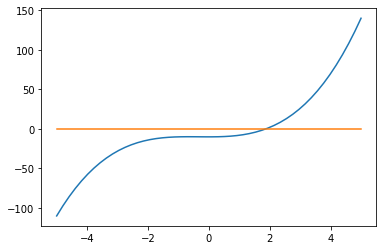

In [6]:
g = lambda x: x**3+x**2-10
x = np.linspace(-5,5)

plt.plot(x,g(x))
plt.plot(x,np.zeros_like(x))

Sekantensuchfunktion(g, 0)

# Test der Nullstellensuchfunktionen für $f(x)=(x+\frac{1}{2})^n -2$ mit n=1,2,3,4

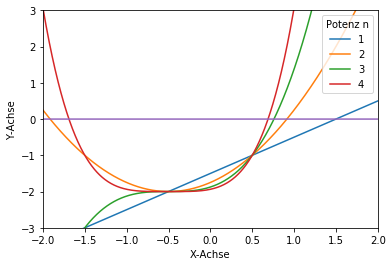

Die von der Bisektionssuchfunktion ermittelten Nullstellen und Iterationsnummer sind in aufsteigender Reihenfolge für n=1,2,3,4: [(1.5, 3), (0.9142135605216026, 29), (0.7599210515618324, 29), (0.6892071180045605, 30)]
Die von der Sekantensuchfunktion ermittelten Nullstellen und Iterationsnummer sind in aufsteigender Reihenfolge für n=1,2,3,4: [(1.5000000000001654, 1), (0.9142135632713787, 5), (0.7599210500879978, 7), (0.68920711500458, 10)]


In [7]:
x = np.linspace(-2,2,num=20000)
mylist1=[]
mylist2=[]
f = lambda x, i: (x+0.5)**i-2
for i in range(1,5,1):
    plt.plot(x, f(x,i),label=i)
    g = lambda x: (x+0.5)**i-2
    BNullstellen= Bisektionsuchfunktion( g , x1=0, x2=4)
    SNullstellen= Sekantensuchfunktion( g , 0)
    mylist1.append(BNullstellen)
    mylist2.append(SNullstellen)
plt.plot(x,np.zeros_like(x))
plt.legend(title="Potenz n",loc='upper right')
plt.xlabel('X-Achse')
plt.ylabel('Y-Achse')
startx, endx = -2, 2
starty, endy = -3, 3
plt.axis([startx, endx, starty, endy])
plt.show()
print("Die von der Bisektionssuchfunktion ermittelten Nullstellen und Iterationsnummer sind in aufsteigender Reihenfolge für n=1,2,3,4:", mylist1)
print("Die von der Sekantensuchfunktion ermittelten Nullstellen und Iterationsnummer sind in aufsteigender Reihenfolge für n=1,2,3,4:", mylist2)

# Test der Sekantensuchfunktion für $f(x)=(x+\frac{1}{2})^n -2$ mit n=1,2,3,4 und Startwerten $x_0 \in [-2,2]$ mit $\Delta x_0= 0.5$

Fehler: Steigung der Sekante ist gleich 0


Text(0, 0.5, 'Iterationszahl')

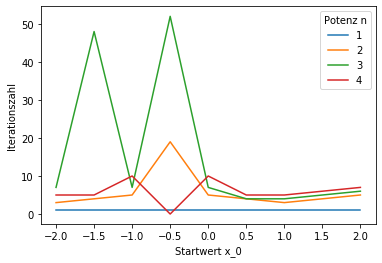

In [8]:
mylistN=[]
for i in range(1,5,1):
    g = lambda x: (x+0.5)**i-2
    for j in range(0,9,1):
        N=Sekantensuchfunktion( g , j/2-2)
        mylistN.append(N)  
n = 1
Iterationszahlen=[x[n] for x in mylistN]
x=np.linspace(-2,2,num=9)
plt.plot(x,Iterationszahlen[:9],label=1)
plt.plot(x,Iterationszahlen[9:18],label=2)
plt.plot(x,Iterationszahlen[18:27],label=3)
plt.plot(x,Iterationszahlen[27:36],label=4)
plt.legend(title="Potenz n",loc='upper right')
plt.xlabel('Startwert x_0')
plt.ylabel('Iterationszahl')

Da bei eins der Startwerte die Sekantensuchfunktion auf eine Stelle traf mit $f'(x_{n+1})=0$ wurde die Suchfunktion in dieser Iterationsfolge unterbrochen mit dem Output ''Fehler: Steigung der Sekante ist gleich 0''